In [ ]:
%%capture
#!pip install yfinance 
!pip3 install yfinance --upgrade --no-cache-dir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

import os
import pandas as pd
from datetime import datetime
from pandas_datareader.data import DataReader
import yfinance as yf
yf.pdr_override()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cargamos el CSV con los tickers que queremos correlacionar

In [ ]:
df = pd.read_csv("ibex_tickers.csv")
df

,indexes,tickers,stocks,sector,nota
0,Ibex 35,ACS.MC,ACS,NaN,NaN
1,Ibex 35,AENA.MC,AENA,NaN,NaN
2,Ibex 35,AMS.MC,AMADEUS,NaN,NaN
3,Ibex 35,ANA.MC,ACCIONA,NaN,NaN
4,Ibex 35,BBVA.MC,BANCO DE BILBAO VIZCAYA,NaN,NaN
...,...,...,...,...,...
114,mab,MED.MC,MED,NaN,NaN
115,mab,NTX.MC,Netex,NaN,NaN
116,mab,PANG.MC,PANG,NaN,NaN
117,mab,RBT.MC,RBT,NaN,NaN


In [ ]:
tickers = df['tickers'].values
tickers

array(['ACS.MC', 'AENA.MC', 'AMS.MC', 'ANA.MC', 'BBVA.MC', 'BKT.MC',
       'CABK.MC', 'CLNX.MC', 'COL.MC', 'ELE.MC', 'ENG.MC', 'FDR.MC',
       'FER.MC', 'IAG.MC', 'IBE.MC', 'IDR', 'ITX.MC', 'MAP.MC', 'MEL.MC',
       'MTS.MC', 'NTGY.MC', 'RED.MC', 'REP.MC', 'ROVI.MC', 'SAB.MC',
       'SAN.MC', 'SCYR.MC', 'SGRE.MC', 'SLR.MC', 'TEF.MC', 'GRF.MC',
       'A3M.MC', 'ACX.MC', 'ADX.MC', 'AEDAS.MC', 'AI.MC', 'AIR.MC',
       'ALB.MC', 'ALM.MC', 'ANE.MC', 'APAM.MC', 'APPS.MC', 'CAF.MC',
       'CASH.MC', 'CCEP.MC', 'CEV.MC', 'CIE.MC', 'DESA.MC', 'DIA.MC',
       'DOM.MC', 'EAT.MC', 'EBRO.MC', 'ECR.MC', 'EDR.MC', 'ENC.MC',
       'ENER.MC', 'ENO.MC', 'EZE.MC', 'FAE.MC', 'FCC.MC', 'GALQ.MC',
       'GCO.MC', 'GEST.MC', 'GRE.MC', 'GSJ.MC', 'HOME.MC', 'IDR.MC',
       'ISE.MC', 'ISUR.MC', 'LDA.MC', 'LOG.MC', 'LRE.MC', 'MTB.MC',
       'MVC.MC', 'NEA.MC', 'NHH.MC', 'NTH.MC', 'NXT.MC', 'NYE.MC',
       'OHLA.MC', 'OLE.MC', 'ORY.MC', 'PRM.MC', 'PRS.MC', 'PSG.MC',
       'R4.MC', 'REN.MC', 'RJF.MC'

## Carga información de los tickers desde la apio de yahoo finance

In [ ]:
# tickers que no cargan en yahoo agregarlos aquí
problems = ['GRE.MC']

def stocks_yahoo():
  if not os.path.exists('stocks_dfs'):
    os.makedirs('stocks_dfs')
  
  start = datetime(2022,1,23)
  end = datetime(2023,1,23)

  for ticker in tickers:
    #print(ticker)
    if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)) and ticker not in problems:
      # df = DataReader(ticker, 'yahoo', start, end)
      df = yf.download(ticker, start, end)
      print(ticker)
      df.to_csv('stocks_dfs/{}.csv'.format(ticker))

stocks_yahoo()

## Unión de todos los tickers

In [ ]:
def join_data():
  main_df = pd.DataFrame()
  for ticker in tickers:
    print(ticker)
    if os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
      df = pd.read_csv('stocks_dfs/{}.csv'.format(ticker))
      df.set_index('Date', inplace=True)
      df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
      df.rename(columns = {'Adj Close': ticker}, inplace=True)

      if main_df.empty:
        main_df = df
      else:
        main_df = main_df.join(df, how='outer')

  main_df.to_csv('ibex_stocks_joined.csv')
  

join_data()


## Buscamos las correlaciones

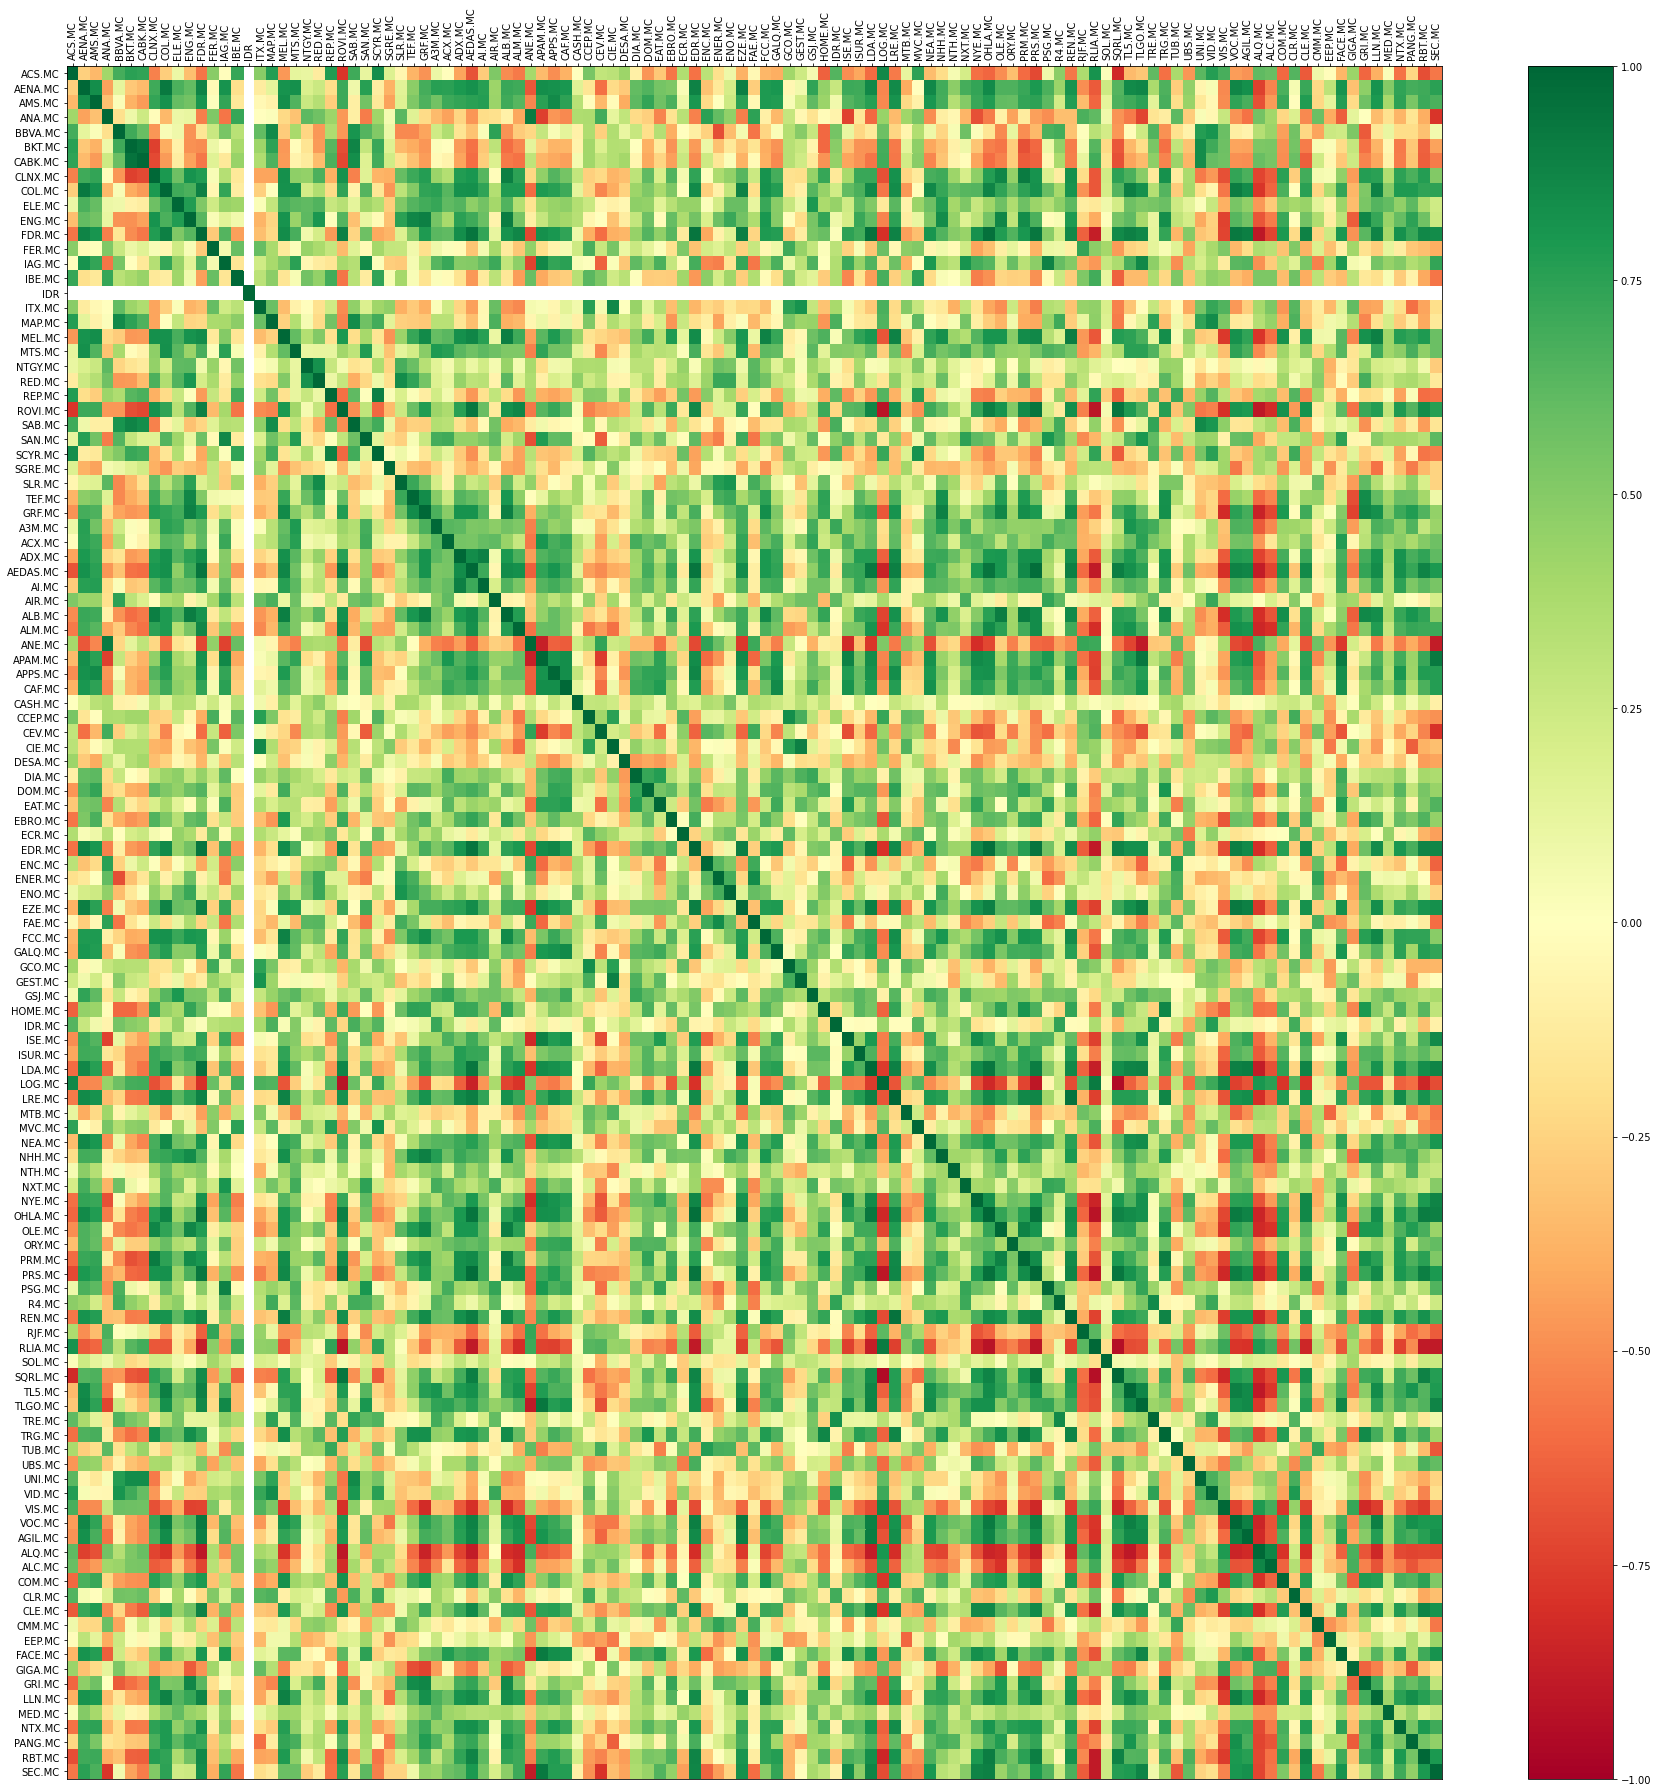

           ACS.MC   AENA.MC    AMS.MC    ANA.MC   BBVA.MC    BKT.MC   CABK.MC  \
ACS.MC   1.000000 -0.262750 -0.352111  0.410747  0.686159  0.750514  0.740948   
AENA.MC -0.262750  1.000000  0.841950 -0.431696  0.131099 -0.289460 -0.349164   
AMS.MC  -0.352111  0.841950  1.000000 -0.325588  0.027344 -0.380172 -0.453406   
ANA.MC   0.410747 -0.431696 -0.325588  1.000000 -0.192878  0.092364  0.246120   
BBVA.MC  0.686159  0.131099  0.027344 -0.192878  1.000000  0.702681  0.587057   
...           ...       ...       ...       ...       ...       ...       ...   
MED.MC   0.027053  0.502990  0.393190 -0.182493  0.110981 -0.048633 -0.079885   
NTX.MC  -0.582396  0.741730  0.749295 -0.367632 -0.203668 -0.559025 -0.549925   
PANG.MC -0.231712  0.684038  0.537256 -0.171498 -0.207449 -0.293995 -0.305003   
RBT.MC  -0.699717  0.700907  0.704510 -0.392198 -0.321450 -0.636139 -0.646275   
SEC.MC  -0.564087  0.751642  0.664346 -0.787316  0.064753 -0.436096 -0.550764   

          CLNX.MC    COL.MC

In [ ]:
#from pandas.core.computation.parsing import clean_column_name
def corr_heatmap():
  df = pd.read_csv('ibex_stocks_joined.csv')
  df_corr = df.corr()

  #print(df_corr)

  import matplotlib.pyplot as plt
  from numpy import arange

  # convertimos el DF en un array de arrays y creamos el gráfico
  data = df_corr.values
  #print(data)
  fig = plt.figure(figsize=(25, 25))
  ax = fig.add_subplot(1,1,1)

  # colores de los elementos del mapa
  heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
  fig.colorbar(heatmap)

  # leyenda del eje x e y
  ax.set_xticks(arange(data.shape[0]) + 0.5, minor=False)
  ax.set_yticks(arange(data.shape[1]) + 0.5, minor=False)
  ax.invert_yaxis()
  ax.xaxis.tick_top()

  # ponemos nombres a las etiquetas
  column_labels = df_corr.columns
  row_labels = df_corr.index
  ax.set_xticklabels(column_labels)
  ax.set_yticklabels(row_labels)
  plt.xticks(rotation=90)

  heatmap.set_clim(-1,1)

  plt.tight_layout()
  plt.show()

  return df_corr


df_corr = corr_heatmap()



## Ejercicio
### Ver correlaciones
- Pedir un ticker e imprimir
  - tickers positivamente correlacionados más de un 90%
  - tickers no correlacionados (-10% > ticker < +10%) 
  - tickers negativamente correlacionados menos -90%